# Data Visualizations

### CA1 - 2023

### Ayllin Bukovic - 2023003

This project aims to analize a dataset based on board games from a retail company. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
First we import the necesary libraries:

In [1]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

import warnings
warnings.filterwarnings('ignore')

### Part 1

In [2]:
df = pd.read_csv('board_games.csv')
df.head(5)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [3]:
df.shape

(10532, 22)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [5]:
df_games=df.drop(columns=["game_id","description","image","thumbnail","artist","compilation",
                    "designer","expansion","family","publisher"])

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_players     10532 non-null  int64  
 1   max_playtime    10532 non-null  int64  
 2   min_age         10532 non-null  int64  
 3   min_players     10532 non-null  int64  
 4   min_playtime    10532 non-null  int64  
 5   name            10532 non-null  object 
 6   playing_time    10532 non-null  int64  
 7   year_published  10532 non-null  int64  
 8   category        10438 non-null  object 
 9   mechanic        9582 non-null   object 
 10  average_rating  10532 non-null  float64
 11  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 987.5+ KB


In [7]:
df_games.isna().sum()

max_players         0
max_playtime        0
min_age             0
min_players         0
min_playtime        0
name                0
playing_time        0
year_published      0
category           94
mechanic          950
average_rating      0
users_rated         0
dtype: int64

In [8]:
df_games.duplicated().sum()

0

In [9]:
df_games["category"].fillna(value="No Category", inplace=True)


In [10]:
df_games["mechanic"].fillna(value="No Mechanic", inplace=True)

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_players     10532 non-null  int64  
 1   max_playtime    10532 non-null  int64  
 2   min_age         10532 non-null  int64  
 3   min_players     10532 non-null  int64  
 4   min_playtime    10532 non-null  int64  
 5   name            10532 non-null  object 
 6   playing_time    10532 non-null  int64  
 7   year_published  10532 non-null  int64  
 8   category        10532 non-null  object 
 9   mechanic        10532 non-null  object 
 10  average_rating  10532 non-null  float64
 11  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 987.5+ KB


In [12]:
order_columns = ['name', 'average_rating', 'category', 'max_playtime','min_playtime','playing_time','min_age', 
             'min_players','max_players','mechanic', 'users_rated','year_published']
df_games=df_games[order_columns]
df_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published
0,Die Macher,7.66508,"Economic,Negotiation,Political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",4498,1986
1,Dragonmaster,6.60815,"Card Game,Fantasy",30,30,30,12,3,4,Trick-taking,478,1981
2,Samurai,7.44119,"Abstract Strategy,Medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",12019,1998
3,Tal der Könige,6.60675,Ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",314,1992
4,Acquire,7.35830,Economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",15195,1964
...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.35333,"Vietnam War,Wargame",480,30,480,12,1,2,Hex-and-Counter,75,2016
10528,Codex: Card-Time Strategy – Core Set,8.08780,"Card Game,Fantasy,Fighting,Video Game Theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",82,2016
10529,Wind the Film!,7.28016,Card Game,20,20,20,12,2,4,"Hand Management,Set Collection",63,2016
10530,Robo Rally (2016),7.45871,"Miniatures,Racing,Science Fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",341,2016


#### 1. What are the top 5 “average rated” games?  

In [13]:
top5=df_games.sort_values(by="average_rating", ascending=False)
top_5=top5.head(5)
top_5

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published
8348,Small World Designer Edition,9.00392,"Civilization,Fantasy,Territory Building",80,40,80,8,2,6,"Area Control / Area Influence,Area Movement,Di...",180,2015
6392,Kingdom Death: Monster,8.93184,"Adventure,Fantasy,Horror,Mature / Adult,Miniat...",180,60,180,17,1,6,"Co-operative Play,Dice Rolling,Grid Movement,R...",1954,2015
9964,Terra Mystica: Big Box,8.84862,"Civilization,Economic,Fantasy,Territory Building",150,60,150,12,2,5,"Route/Network Building,Variable Player Powers",109,2015
8526,Last Chance for Victory,8.84603,"American Civil War,Civil War,Wargame",60,60,60,15,2,2,"Dice Rolling,Hex-and-Counter",88,2014
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",8.83081,"Wargame,World War II",6000,60,6000,12,2,8,Chit-Pull System,86,2015


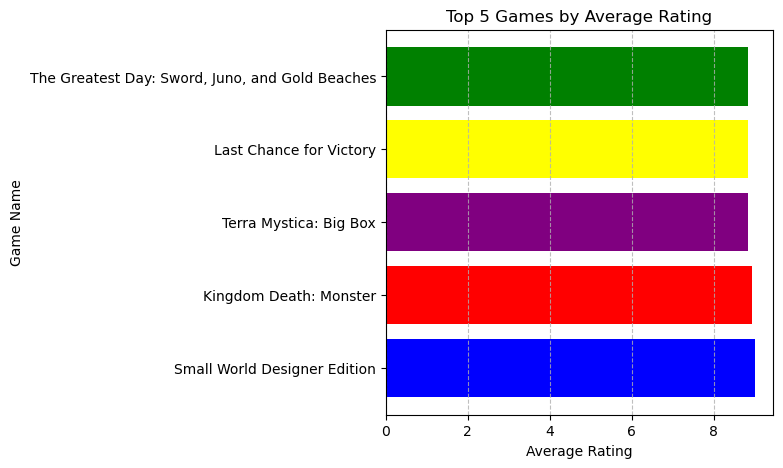

In [14]:
plt.figure(figsize=(5,5))

plt.barh(top_5["name"],top_5["average_rating"],color=["blue","red","purple","yellow","green"])
plt.xlabel("Average Rating")
plt.ylabel("Game Name")
plt.title("Top 5 Games by Average Rating")
plt.grid(axis='x', linestyle='--', alpha=0.8)


#### 2. Is there a correlation between the “users_rated” and the “max_playtime”?  

In [15]:
df_games[["users_rated","max_playtime"]].corr()

,users_rated,max_playtime
users_rated,1.000000,-0.004342
max_playtime,-0.004342,1.000000


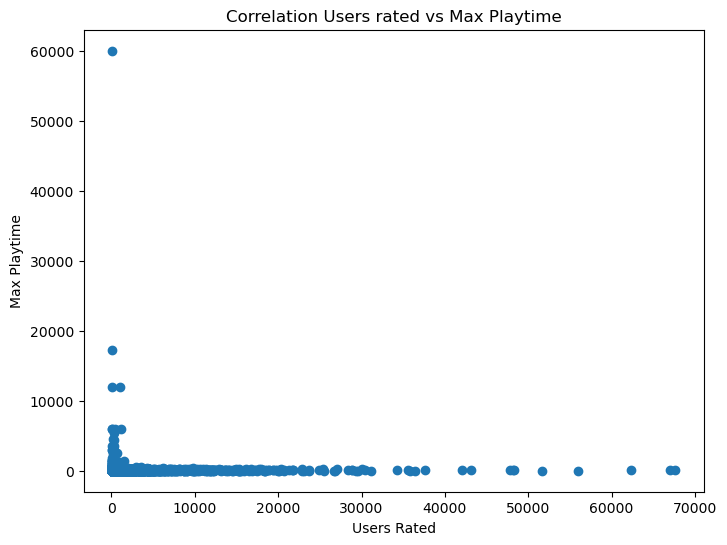

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x="users_rated", y="max_playtime", data=df_games)
plt.title("Correlation Users rated vs Max Playtime")
plt.xlabel("Users Rated")
plt.ylabel("Max Playtime");

The tread is not clear at all, so we can say that both variables are not correlated

#### 3. What is the distribution of game categories? (You may not use a barchart)

In [17]:
category=df_games["category"].unique()
category

array(['Economic,Negotiation,Political', 'Card Game,Fantasy',
       'Abstract Strategy,Medieval', ..., 'Bluffing,Deduction,Dice',
       'Fantasy,Fighting,Miniatures,Sports',
       'Bluffing,Horror,Maze,Movies / TV / Radio theme,Science Fiction'],
      dtype=object)

In [18]:
category_list = list(category)
category_list

['Economic,Negotiation,Political',
 'Card Game,Fantasy',
 'Abstract Strategy,Medieval',
 'Ancient',
 'Economic',
 'Civilization,Nautical',
 'Abstract Strategy',
 'Civilization,Fantasy',
 'Exploration',
 'Fantasy,Travel',
 'Card Game,Farming,Negotiation',
 'Ancient,Mythology',
 'Negotiation',
 'Bluffing,Negotiation,Science Fiction',
 'Collectible Components,Dice,Fighting,Print & Play',
 'Miniatures,Racing,Science Fiction',
 'American West,Bluffing,City Building',
 'Science Fiction',
 'Adventure,Exploration,Fantasy',
 'Fantasy,Political,Wargame',
 'Civilization,Negotiation,Political,Science Fiction,Space Exploration,Wargame',
 'Exploration,Fantasy,Wargame',
 'Civilization,Economic,Medieval,Renaissance',
 'Economic,Political,Wargame',
 'Card Game,Humor,Negotiation,Political',
 'Fighting,Humor',
 'Adventure,Electronic,Exploration,Fantasy,Fighting',
 'Adventure,Exploration,Fantasy,Fighting,Miniatures',
 'Abstract Strategy,American West',
 'Adventure,Horror,Novel-based',
 'Science Fiction,Wa

In [19]:
df_category = pd.DataFrame({"category": category_list})
df_category.head(50)

,category
0,"Economic,Negotiation,Political"
1,"Card Game,Fantasy"
2,"Abstract Strategy,Medieval"
3,Ancient
4,Economic
5,"Civilization,Nautical"
6,Abstract Strategy
7,"Civilization,Fantasy"
8,Exploration
9,"Fantasy,Travel"


In [20]:
df_category.duplicated().sum()

0

In [21]:

df_category_split=df_games["category"].str.split(",",expand=True)
df_category_split

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Economic,Negotiation,Political,None,None,None,None,None,None,None,None,None,None,None
1,Card Game,Fantasy,None,None,None,None,None,None,None,None,None,None,None,None
2,Abstract Strategy,Medieval,None,None,None,None,None,None,None,None,None,None,None,None
3,Ancient,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Economic,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,Vietnam War,Wargame,None,None,None,None,None,None,None,None,None,None,None,None
10528,Card Game,Fantasy,Fighting,Video Game Theme,None,None,None,None,None,None,None,None,None,None
10529,Card Game,None,None,None,None,None,None,None,None,None,None,None,None,None
10530,Miniatures,Racing,Science Fiction,None,None,None,None,None,None,None,None,None,None,None


In [22]:
df_games = pd.concat([df_games, df_category_split], axis=1)
df_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,...,4,5,6,7,8,9,10,11,12,13
0,Die Macher,7.66508,"Economic,Negotiation,Political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",...,None,None,None,None,None,None,None,None,None,None
1,Dragonmaster,6.60815,"Card Game,Fantasy",30,30,30,12,3,4,Trick-taking,...,None,None,None,None,None,None,None,None,None,None
2,Samurai,7.44119,"Abstract Strategy,Medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",...,None,None,None,None,None,None,None,None,None,None
3,Tal der Könige,6.60675,Ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",...,None,None,None,None,None,None,None,None,None,None
4,Acquire,7.35830,Economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.35333,"Vietnam War,Wargame",480,30,480,12,1,2,Hex-and-Counter,...,None,None,None,None,None,None,None,None,None,None
10528,Codex: Card-Time Strategy – Core Set,8.08780,"Card Game,Fantasy,Fighting,Video Game Theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",...,None,None,None,None,None,None,None,None,None,None
10529,Wind the Film!,7.28016,Card Game,20,20,20,12,2,4,"Hand Management,Set Collection",...,None,None,None,None,None,None,None,None,None,None
10530,Robo Rally (2016),7.45871,"Miniatures,Racing,Science Fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",...,None,None,None,None,None,None,None,None,None,None


In [23]:
pd.reset_option('display.max_columns')
pd.reset_option('display.precision')

pd.set_option('display.max_columns',50)
pd.set_option('display.precision',1)


In [24]:
df_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Die Macher,7.7,"Economic,Negotiation,Political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",4498,1986,Economic,Negotiation,Political,None,None,None,None,None,None,None,None,None,None,None
1,Dragonmaster,6.6,"Card Game,Fantasy",30,30,30,12,3,4,Trick-taking,478,1981,Card Game,Fantasy,None,None,None,None,None,None,None,None,None,None,None,None
2,Samurai,7.4,"Abstract Strategy,Medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",12019,1998,Abstract Strategy,Medieval,None,None,None,None,None,None,None,None,None,None,None,None
3,Tal der Könige,6.6,Ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",314,1992,Ancient,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Acquire,7.4,Economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",15195,1964,Economic,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.4,"Vietnam War,Wargame",480,30,480,12,1,2,Hex-and-Counter,75,2016,Vietnam War,Wargame,None,None,None,None,None,None,None,None,None,None,None,None
10528,Codex: Card-Time Strategy – Core Set,8.1,"Card Game,Fantasy,Fighting,Video Game Theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",82,2016,Card Game,Fantasy,Fighting,Video Game Theme,None,None,None,None,None,None,None,None,None,None
10529,Wind the Film!,7.3,Card Game,20,20,20,12,2,4,"Hand Management,Set Collection",63,2016,Card Game,None,None,None,None,None,None,None,None,None,None,None,None,None
10530,Robo Rally (2016),7.5,"Miniatures,Racing,Science Fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",341,2016,Miniatures,Racing,Science Fiction,None,None,None,None,None,None,None,None,None,None,None


In [25]:
df_games.rename(columns={0: 'c1', 1: 'c2',2: 'c3', 3: 'c4',4: 'c5', 5: 'c6',6: 'c7', 7: 'c8',8: 'c9',
                         9: 'c10',10: 'c11', 11: 'c12',12: 'c13', 13: 'c14'}, inplace=True)

In [26]:
df_games["c1"].unique()

array(['Economic', 'Card Game', 'Abstract Strategy', 'Ancient',
       'Civilization', 'Exploration', 'Fantasy', 'Negotiation',
       'Bluffing', 'Collectible Components', 'Miniatures',
       'American West', 'Science Fiction', 'Adventure', 'Fighting',
       'Deduction', 'Dice', 'Aviation / Flight', 'Renaissance',
       'City Building', 'Medieval', 'Trivia', 'Political', 'Wargame',
       'American Civil War', 'Age of Reason', 'Animals', 'Nautical',
       'Territory Building', 'Prehistoric', 'Electronic',
       'Action / Dexterity', 'Educational', 'Racing', 'Print & Play',
       'Trains', 'Party Game', 'Civil War', 'American Indian Wars',
       'Napoleonic', 'Humor', 'Movies / TV / Radio theme',
       'American Revolutionary War', 'Mafia', "Children's Game",
       'Comic Book / Strip', 'No Category', 'Arabian', 'Novel-based',
       'Pirates', 'Transportation', 'Puzzle', 'Music', 'Horror',
       'Post-Napoleonic', 'Sports', 'Farming', 'Murder/Mystery',
       'Word Game', 'B

In [27]:
df_games["c2"].unique()

array(['Negotiation', 'Fantasy', 'Medieval', None, 'Nautical', 'Travel',
       'Farming', 'Mythology', 'Dice', 'Racing', 'Bluffing',
       'Exploration', 'Political', 'Economic', 'Humor', 'Electronic',
       'American West', 'Horror', 'Wargame', 'Word Game', 'Civilization',
       'Ancient', 'Maze', 'Territory Building', 'World War II',
       'Card Game', 'Movies / TV / Radio theme', 'World War I', 'Trains',
       "Children's Game", 'Pirates', 'Fighting', 'Murder/Mystery',
       'Real-time', 'Transportation', 'Science Fiction', 'Puzzle',
       'Party Game', 'Deduction', 'Space Exploration',
       'Industry / Manufacturing', 'Game System', 'Spies/Secret Agents',
       'Medical', 'Sports', 'Mafia', 'Zombies', 'City Building', 'Trivia',
       'Napoleonic', 'Age of Reason', 'American Indian Wars',
       'Renaissance', 'Book', 'Music', 'Animals', 'Action / Dexterity',
       'Novel-based', 'Memory', 'Collectible Components',
       'Modern Warfare', 'Miniatures', 'American Revolu

In [28]:
data=df_games.values.tolist()

In [29]:
# Initialize an empty dictionary to store counts for each category
category_counts = {}

# Iterate through each row
for row in data:
    # Iterate through each column in the row
    for i in range(12,len(row)):
        category= row[i]
        # Count the occurrences of ,each category
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

# Print the category counts
for category, count in category_counts.items():
    print(f"{category}: {count}")

Economic: 878
Negotiation: 389
Political: 297
None: 119934
Card Game: 2981
Fantasy: 1218
Abstract Strategy: 710
Medieval: 534
Ancient: 422
Civilization: 199
Nautical: 355
Exploration: 431
Travel: 109
Farming: 111
Mythology: 166
Bluffing: 655
Science Fiction: 850
Collectible Components: 237
Dice: 838
Fighting: 900
Print & Play: 212
Miniatures: 443
Racing: 402
American West: 131
City Building: 310
Adventure: 541
Wargame: 2034
Space Exploration: 119
Renaissance: 159
Humor: 580
Electronic: 116
Horror: 347
Novel-based: 253
Deduction: 508
Word Game: 229
Territory Building: 264
Aviation / Flight: 166
Maze: 101
Puzzle: 194
Real-time: 315
Trivia: 265
Industry / Manufacturing: 157
Party Game: 833
World War II: 676
American Civil War: 131
Age of Reason: 83
Movies / TV / Radio theme: 486
World War I: 117
Trains: 202
Animals: 572
Children's Game: 704
Pirates: 186
Murder/Mystery: 152
Transportation: 230
Prehistoric: 88
Action / Dexterity: 514
Sports: 243
Game System: 22
Spies/Secret Agents: 95
Educa

In [30]:
df_cat = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
df_cat

,Category,Count
0,Economic,878
1,Negotiation,389
2,Political,297
3,None,119934
4,Card Game,2981
...,...,...
80,Video Game Theme,144
81,Mature / Adult,50
82,Vietnam War,29
83,Korean War,14


In [34]:
df_cat=df_cat.drop(3)

In [35]:

pd.reset_option('display.max_rows')
pd.reset_option('display.precision')

pd.set_option('display.max_rows',100)
pd.set_option('display.precision',1)

In [36]:
df_cat.head(100)

,Category,Count
0,Economic,878
1,Negotiation,389
2,Political,297
4,Card Game,2981
5,Fantasy,1218
6,Abstract Strategy,710
7,Medieval,534
8,Ancient,422
9,Civilization,199
10,Nautical,355


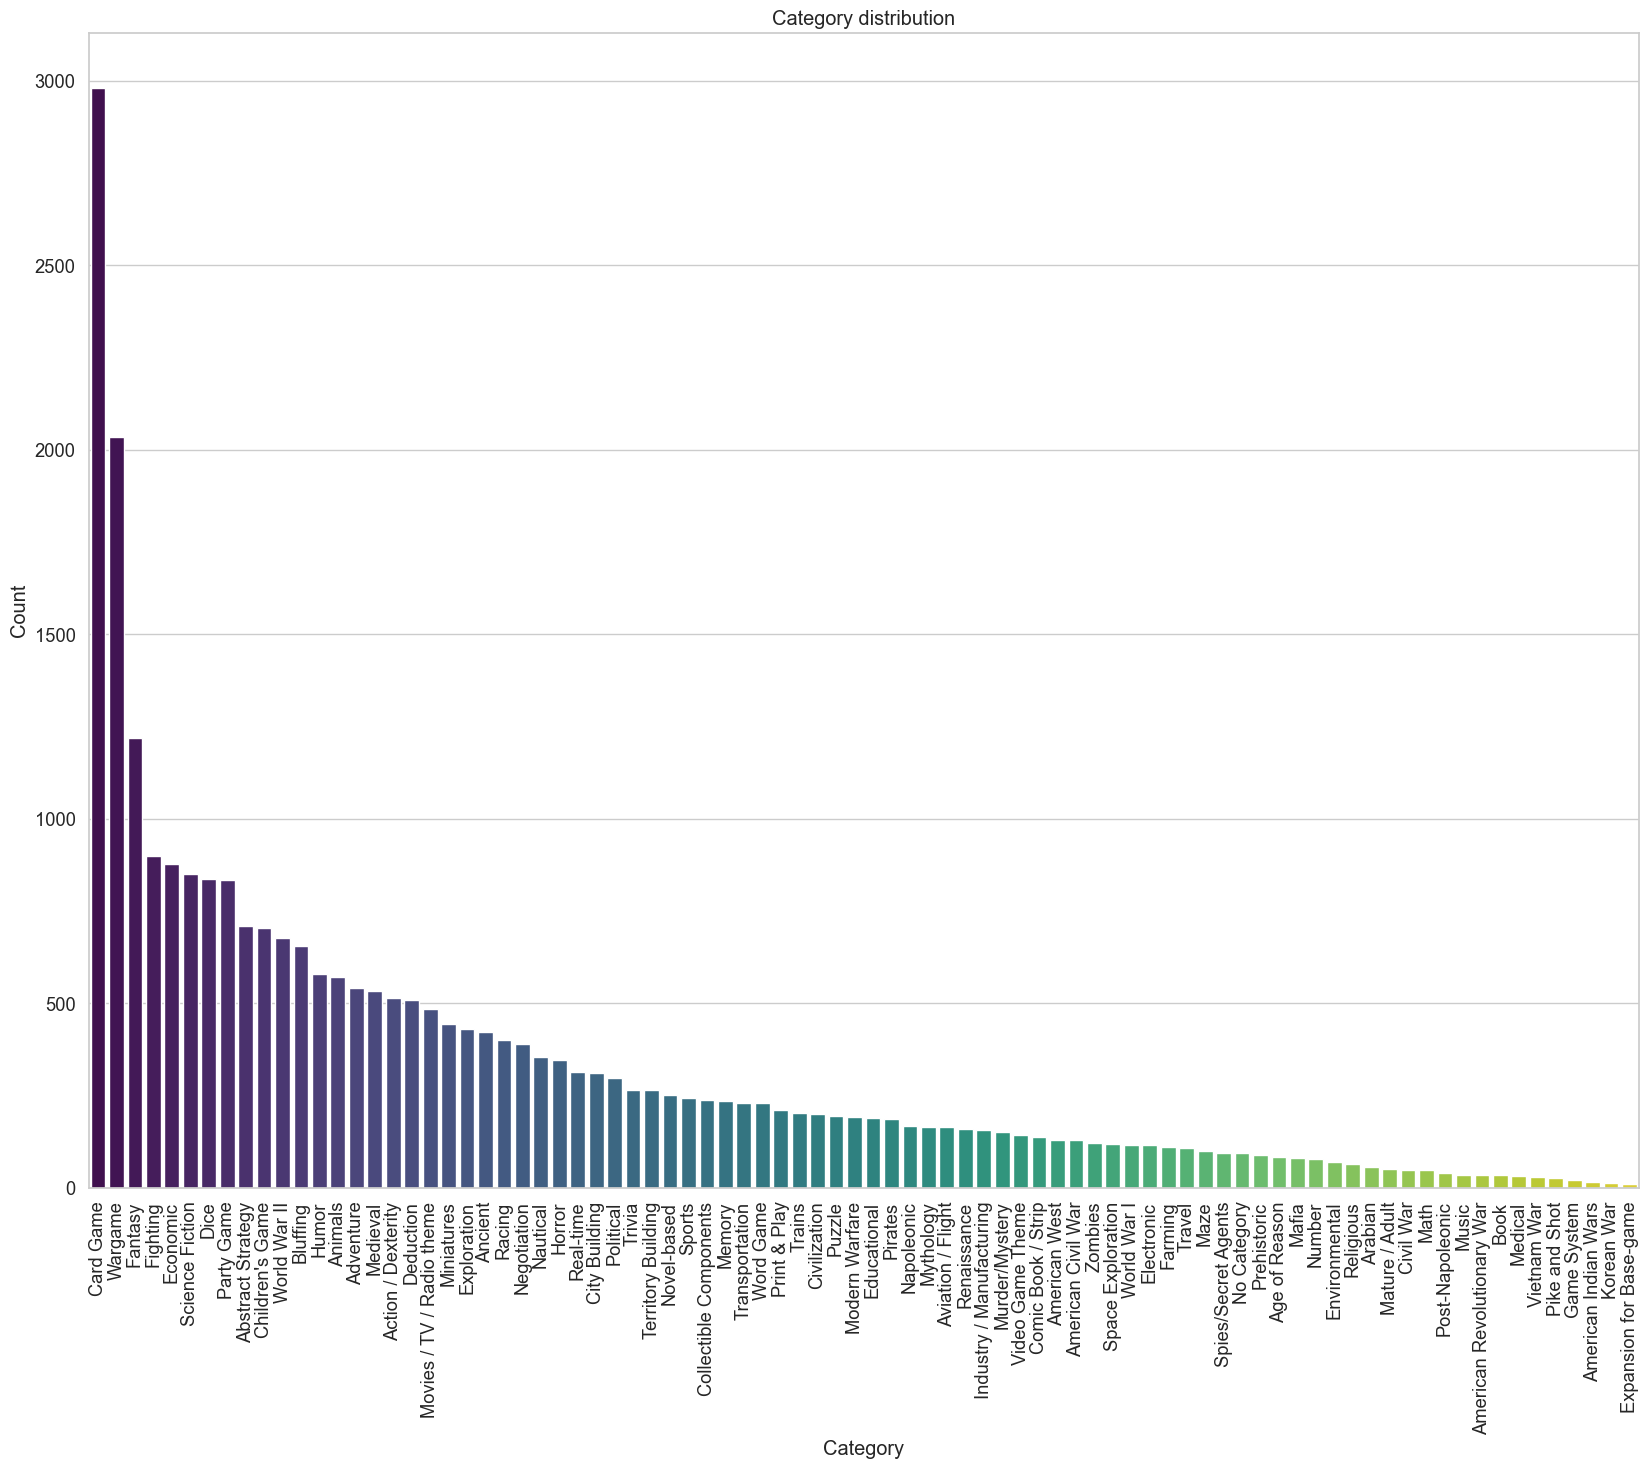

In [41]:
df_cat = df_cat.sort_values(by='Count', ascending=False)
# Configura el estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crea un barplot utilizando Seaborn
plt.figure(figsize=(20, 15))
sns.barplot(x='Category', y='Count', data=df_cat, palette='viridis')

# Añade etiquetas y título
plt.xlabel('Category', )
plt.ylabel('Count')
plt.title('Category distribution')
plt.xticks(rotation=90) 

# Muestra el gráfico
plt.show()

#### Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  

#### What are the 5 most common “mechanics” in the dataset?  